# Car Purchase Amount Prediction

In [107]:
import warnings

In [108]:
warnings.filterwarnings('ignore')

In [109]:
import pandas as pd

In [110]:
data = pd.read_csv('./Car_Purchasing_Data.csv')

### 1. Display first 5 rows

In [111]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


### 2. Display last 5 rows

In [112]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


### 3. find shape of dataset

In [113]:
data.shape

(500, 9)

### 4. get info of dataset

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


### 5. check null values from dataset

In [115]:
data.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 6. get overall statistics

In [116]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 7. visualization

In [117]:
import seaborn as sns

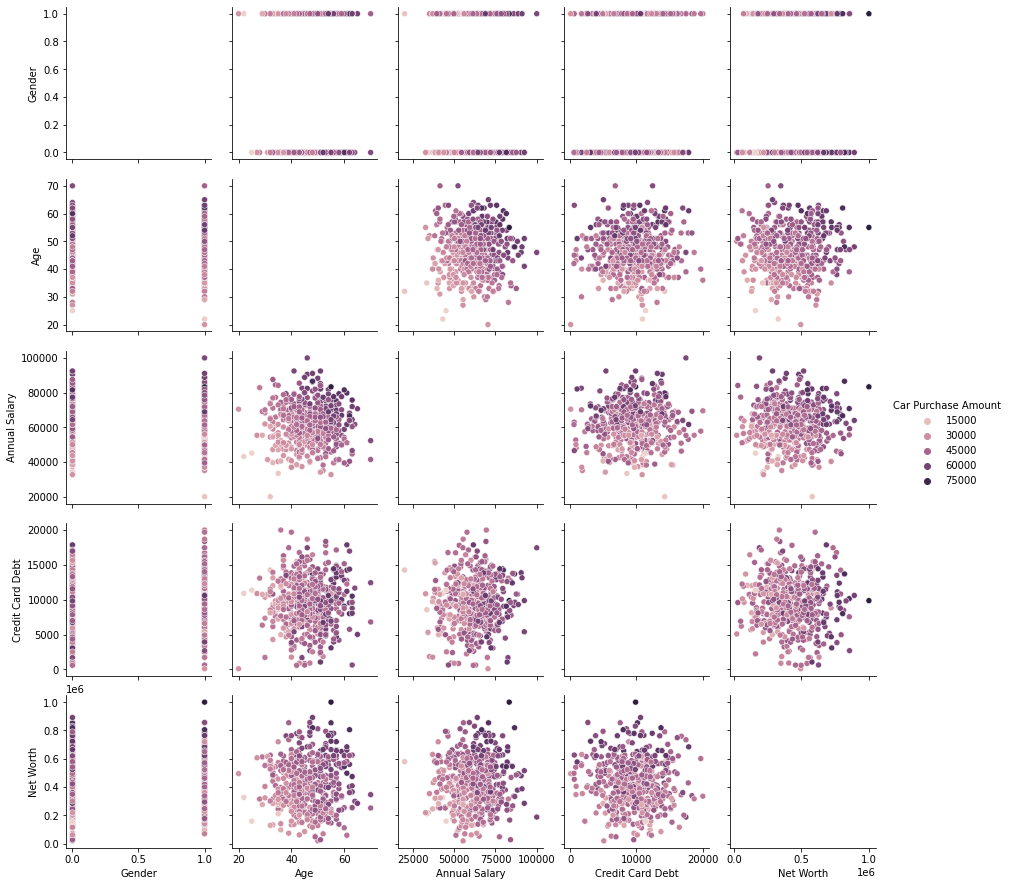

In [118]:
sns.pairplot(data, hue='Car Purchase Amount')

### 8. Store feature matrix in X and response in y

In [119]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [120]:
X = data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis=1)
y = data['Car Purchase Amount']

### 9. feature scaling

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [123]:
X_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.45198622]])

In [124]:
y_reshape = y.values.reshape(-1, 1)

In [125]:
sc1 = MinMaxScaler()
y_scaled = sc1.fit_transform(y_reshape)

### 10. spliting dataset into training and testing

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

### 11. import models

In [128]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 12. model training

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 13. Building ANN

In [131]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#### 13.1 Initialize ANN

In [132]:
ann = Sequential()

#### 13.2 Adding input layer and first hidden layer

In [133]:
ann.add(Dense(25, input_dim=5, activation='relu'))

#### 13.3 Adding second hidden layer

In [134]:
ann.add(Dense(25, activation='relu'))

#### 13.4 Adding output layer

In [135]:
ann.add(Dense(1, activation='linear'))

#### 13.5 training ANN 

In [136]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                150       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [137]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [138]:
ann.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 2s 75ms/step - loss: 0.5035 - val_loss: 0.3836
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.3367 - val_loss: 0.2433
Epoch 3/100
7/7 [==============================] - 0s 22ms/step - loss: 0.2112 - val_loss: 0.1448
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1249 - val_loss: 0.0807
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0664 - val_loss: 0.0404
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.0202
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0162 - val_loss: 0.0140
Epoch 9/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0143 - val_loss: 0.0120
Epoch 11/100
7/7 [=

### 14. Prediction on test data

In [139]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)
y_pred6 = ann.predict(X_test)

4/4 [==============================] - 0s 5ms/step


### 15. evaluate algorithm

In [140]:
from sklearn import metrics

In [141]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
score5 = metrics.r2_score(y_test, y_pred5)
score6 = metrics.r2_score(y_test, y_pred6)

In [142]:
print(score1, score2, score3, score4, score5, score6)

0.9994234310992762 0.9547066777872097 0.9517162096133105 0.9742892514725445 0.9497563859782069 0.9955952019739946


In [143]:
final_data = pd.DataFrame({"Models":['LR','SVR','RF','GBR','XG','ANN'], 'R2_Score':[score1, score2, score3, score4, score5, score6]})
final_data

,Models,R2_Score
0,LR,0.999423
1,SVR,0.954707
2,RF,0.951716
3,GBR,0.974289
4,XG,0.949756
5,ANN,0.995595


In [144]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='R2_Score'>

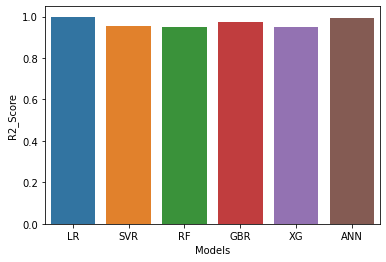

In [145]:
sns.barplot(x=final_data['Models'], y=final_data['R2_Score'])

### 16. Save model

In [146]:
ann.fit(X_scaled, y_scaled, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 7ms/step - loss: 8.3759e-05
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 8.0022e-05
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 7.5394e-05
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 7.3687e-05
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 7.2673e-05
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 7.1619e-05
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 7.4804e-05
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 6.9939e-05
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 6.8240e-05
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 6.6988e-05
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 6.4261e-05
Epoch 12/100
10/10 [==============================] - 0s 5ms/step - loss: 

In [147]:
import joblib

In [148]:
joblib.dump(ann, 'Car_Price_Prediction')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-29 23:25:19         1817
metadata.json                                  2023-03-29 23:25:19           64
variables.h5                                   2023-03-29 23:25:19        30244


['Car_Price_Prediction']

In [149]:
model = joblib.load('Car_Price_Prediction')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-29 23:25:18         1817
metadata.json                                  2023-03-29 23:25:18           64
variables.h5                                   2023-03-29 23:25:18        30244
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


### 17. prediction on new data

In [150]:
import numpy as np

In [151]:
data.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [152]:
X_test1 = sc.transform(np.array([[0, 42, 62812.09301, 11609.38091, 238961.2505]]))

In [153]:
X_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985]])

In [154]:
pred = ann.predict(X_test1)
sc1.inverse_transform(pred)

1/1 [==============================] - 0s 48ms/step


array([[35226.85]], dtype=float32)